In [1]:
import napari
import numpy as np
import matplotlib.pyplot as plt
import z5py
from pathlib import Path

from cryofib.n5_utils import read_volume, print_key_tree, write_volume
from cryofib.napari_utils import napari_add_group

## View n5 datasets

In [3]:
postprocess_path = Path("/scratch/buglakova/data/cryofib/segm_fibsem/F107/F107_A1_train_network_dilated_boundaries_dilate3.n5")
# postprocess_path = Path("/g/kreshuk/buglakova/data/tmp_view/F107_A1_train_network_dilated_boundaries.n5")

f_em = z5py.File(postprocess_path, "r")

In [4]:
print_key_tree(f_em)

Key structure of z5 file /scratch/buglakova/data/cryofib/segm_fibsem/F107/F107_A1_train_network_dilated_boundaries_dilate3.n5
segmentation
input
input/raw
input/raw_norm


## Read volumes

In [5]:
roi = np.s_[:, 400:600, :]
em = read_volume(f_em, "input/raw_norm", roi)

roi = np.s_[:, :, 400:600, :]
segmentation = read_volume(f_em, "segmentation", roi)

<class 'z5py.file.File'>
Reading roi (slice(None, None, None), slice(400, 600, None), slice(None, None, None)) of volume input/raw_norm from /scratch/buglakova/data/cryofib/segm_fibsem/F107/F107_A1_train_network_dilated_boundaries_dilate3.n5
Read volume with shape (1350, 200, 1647), data type float32
<class 'z5py.file.File'>
Reading roi (slice(None, None, None), slice(None, None, None), slice(400, 600, None), slice(None, None, None)) of volume segmentation from /scratch/buglakova/data/cryofib/segm_fibsem/F107/F107_A1_train_network_dilated_boundaries_dilate3.n5
Read volume with shape (4, 1350, 200, 1647), data type int32


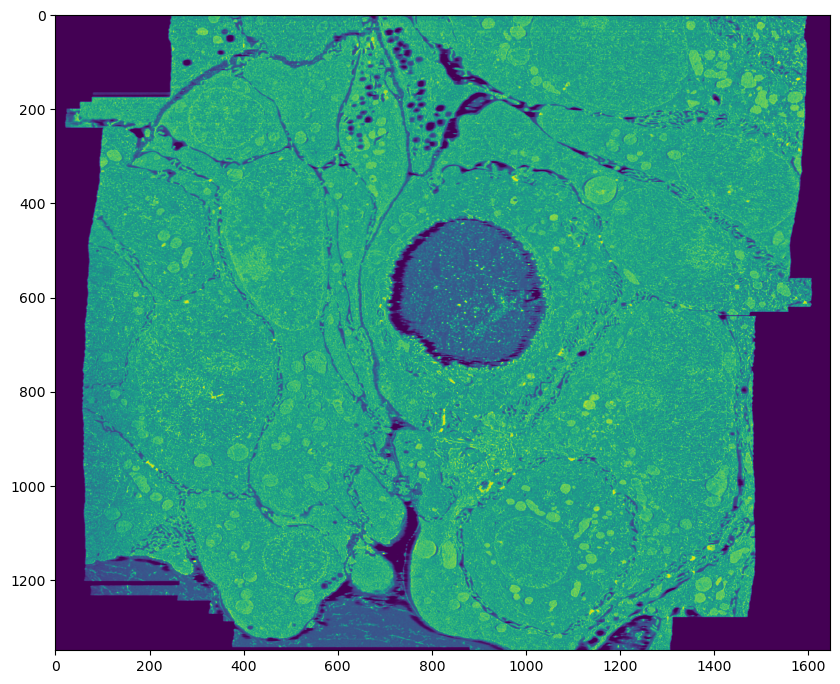

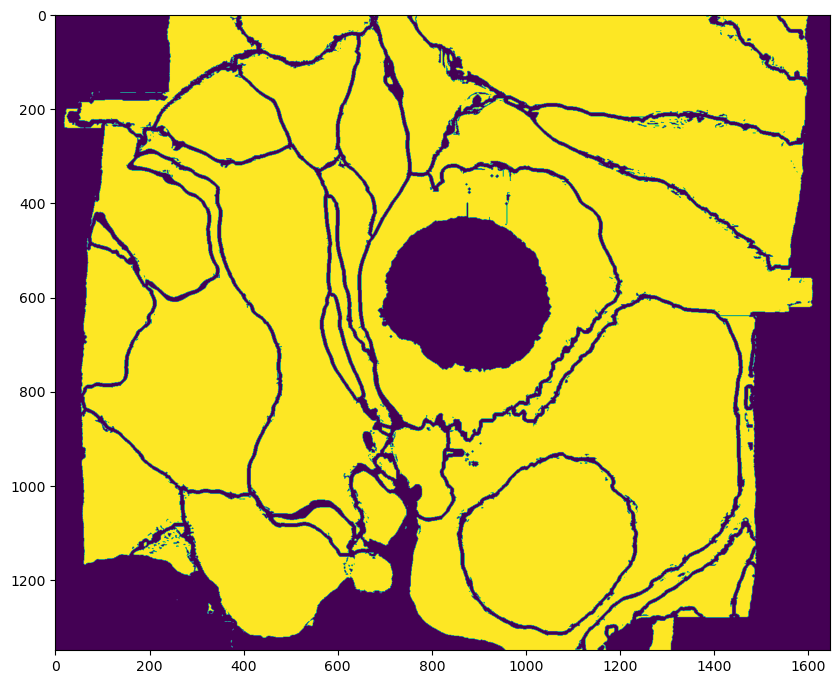

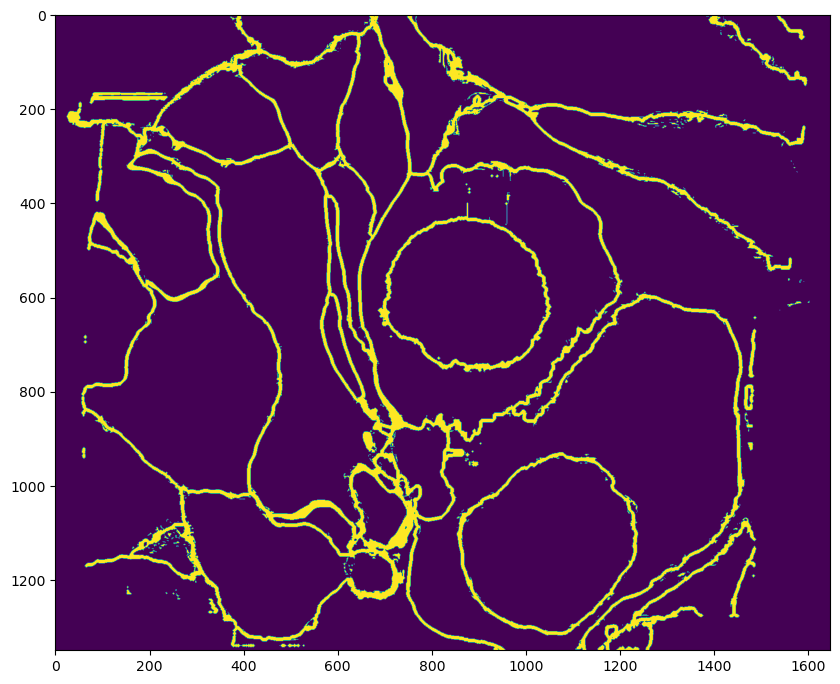

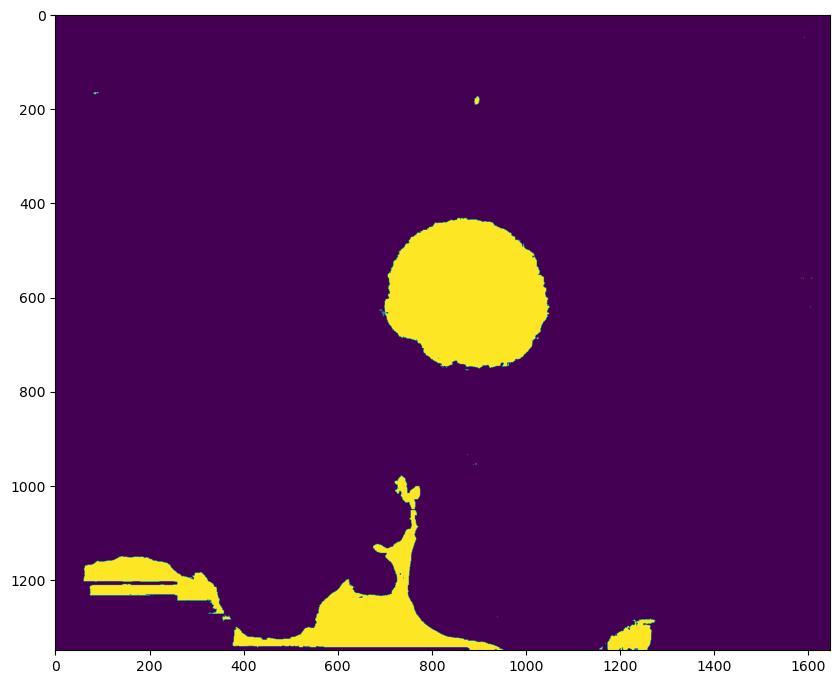

In [6]:
plt.figure(figsize=(10, 10))
plt.imshow(em[:, 0, :])
plt.show()
plt.figure(figsize=(10, 10))
plt.imshow(segmentation[0, :, 0, :])
plt.show()
plt.figure(figsize=(10, 10))
plt.imshow(segmentation[1, :, 0, :])
plt.show()
plt.figure(figsize=(10, 10))
plt.imshow(segmentation[2, :, 0, :])

In [7]:
roi = np.s_[400:600, :, :]
em = read_volume(f_em, "input/raw_norm", roi)

roi = np.s_[:, 400:600, :, :]
segmentation = read_volume(f_em, "segmentation", roi)

<class 'z5py.file.File'>
Reading roi (slice(400, 600, None), slice(None, None, None), slice(None, None, None)) of volume input/raw_norm from /scratch/buglakova/data/cryofib/segm_fibsem/F107/F107_A1_train_network_dilated_boundaries_dilate3.n5
Read volume with shape (200, 1506, 1647), data type float32
<class 'z5py.file.File'>
Reading roi (slice(None, None, None), slice(400, 600, None), slice(None, None, None), slice(None, None, None)) of volume segmentation from /scratch/buglakova/data/cryofib/segm_fibsem/F107/F107_A1_train_network_dilated_boundaries_dilate3.n5
Read volume with shape (4, 200, 1506, 1647), data type int32


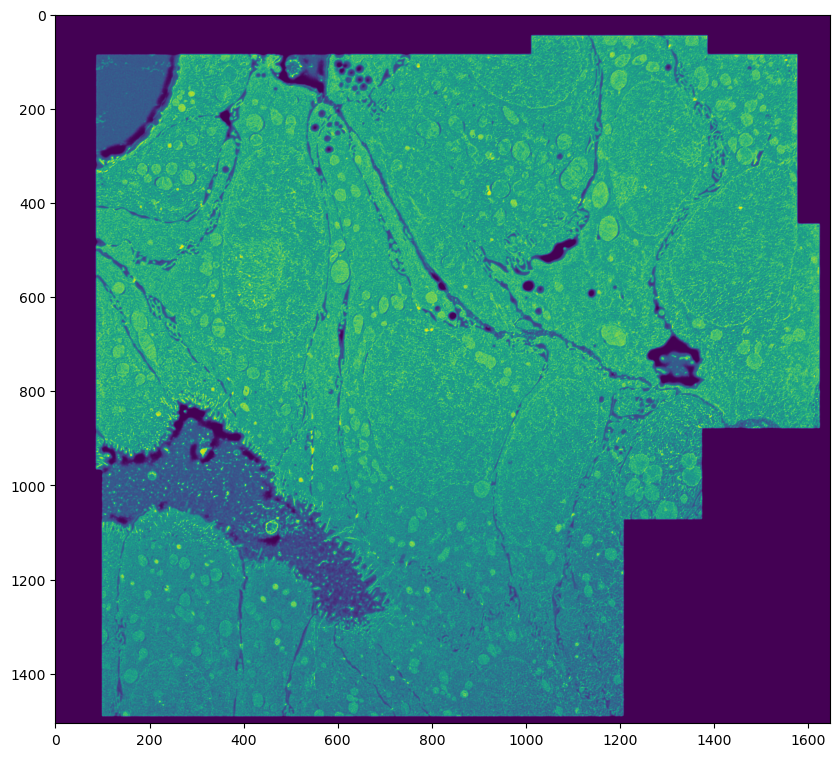

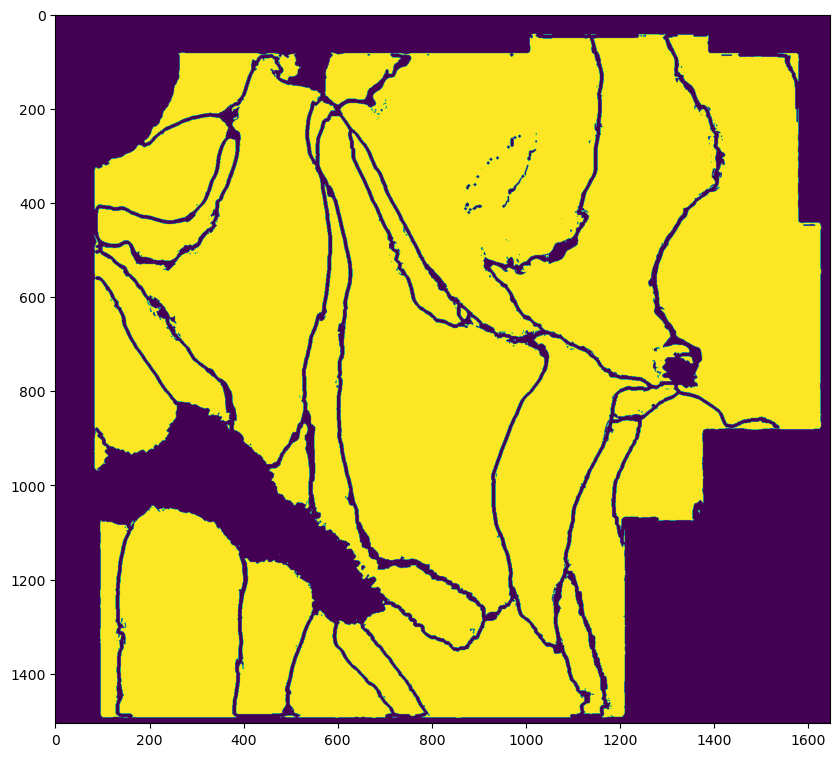

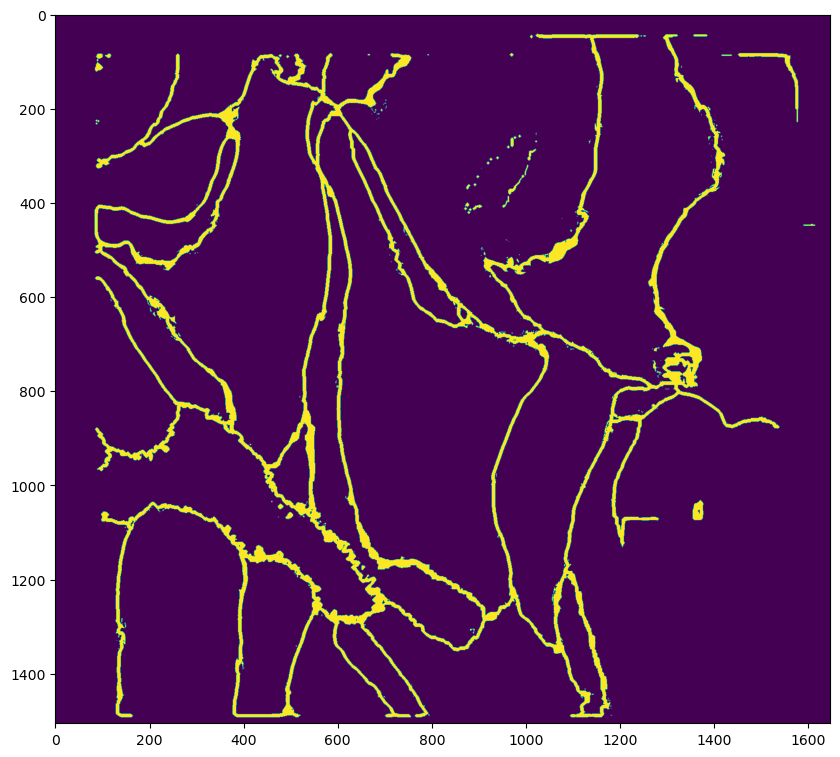

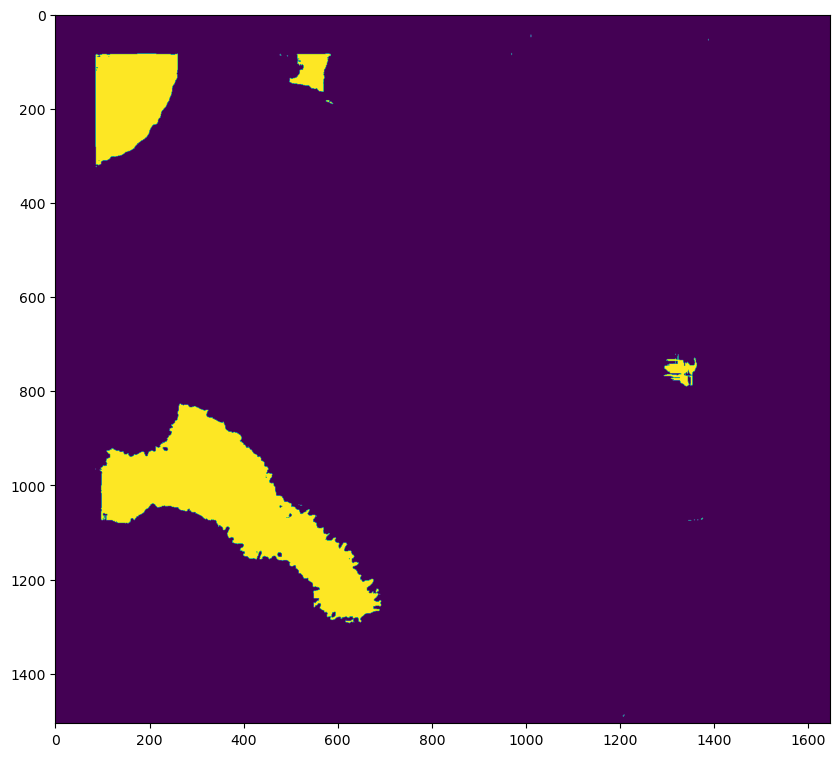

In [8]:
plt.figure(figsize=(10, 10))
plt.imshow(em[0, :, :])
plt.show()
plt.figure(figsize=(10, 10))
plt.imshow(segmentation[0, 0, :, :])
plt.show()
plt.figure(figsize=(10, 10))
plt.imshow(segmentation[1, 0, :, :])
plt.show()
plt.figure(figsize=(10, 10))
plt.imshow(segmentation[2, 0, :, :])

In [9]:
v = napari.Viewer()

In [12]:
roi = np.s_[:, :, :]
em = read_volume(f_em, "input/raw", roi)

roi = np.s_[:, :, :, :]
segmentation = read_volume(f_em, "segmentation", roi)

<class 'z5py.file.File'>
Reading roi (slice(None, None, None), slice(None, None, None), slice(None, None, None)) of volume input/raw from /g/kreshuk/buglakova/data/tmp_view/F107_A1_train_network_dilated_boundaries.n5
Read volume with shape (1350, 1506, 1647), data type uint8
<class 'z5py.file.File'>
Reading roi (slice(None, None, None), slice(None, None, None), slice(None, None, None), slice(None, None, None)) of volume segmentation from /g/kreshuk/buglakova/data/tmp_view/F107_A1_train_network_dilated_boundaries.n5
Read volume with shape (4, 1350, 1506, 1647), data type int32


In [13]:
v.add_image(em, name="raw")

<Image layer 'raw' at 0x7f809c0bad10>

In [14]:
for ch in range(segmentation.shape[0]):
    v.add_labels(segmentation[ch, ...], name=f"segmentation ch {ch}")